In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [0]:
df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")

In [3]:
print (df.head())
print (df.columns)

   account number                         name  ... ext price                 date
0          740150                   Barton LLC  ...   3380.91  2014-01-01 07:21:51
1          714466              Trantow-Barrows  ...    -63.16  2014-01-01 10:00:47
2          218895                    Kulas Inc  ...   2086.10  2014-01-01 13:24:58
3          307599  Kassulke, Ondricka and Metz  ...    863.05  2014-01-01 15:05:22
4          412290                Jerde-Hilpert  ...    499.26  2014-01-01 23:26:55

[5 rows x 7 columns]
Index(['account number', 'name', 'sku', 'quantity', 'unit price', 'ext price',
       'date'],
      dtype='object')


In [0]:
top_10 = (df.groupby('name')['ext price', 'quantity'].agg({'ext price': 'sum', 'quantity': 'count'})
          .sort_values(by='ext price', ascending=False))[:10].reset_index()

In [0]:
top_10.rename(columns={'name': 'Name', 'ext price': 'Sales', 'quantity': 'Purchases'}, inplace=True)

In [6]:
plt.style.available

['tableau-colorblind10',
 'classic',
 'bmh',
 'Solarize_Light2',
 'fast',
 '_classic_test',
 'dark_background',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-talk',
 'seaborn-whitegrid',
 'seaborn-bright',
 'seaborn-deep',
 'seaborn-darkgrid',
 'fivethirtyeight',
 'grayscale',
 'seaborn-muted',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-poster',
 'seaborn-notebook',
 'seaborn-paper',
 'ggplot',
 'seaborn-colorblind',
 'seaborn',
 'seaborn-pastel']

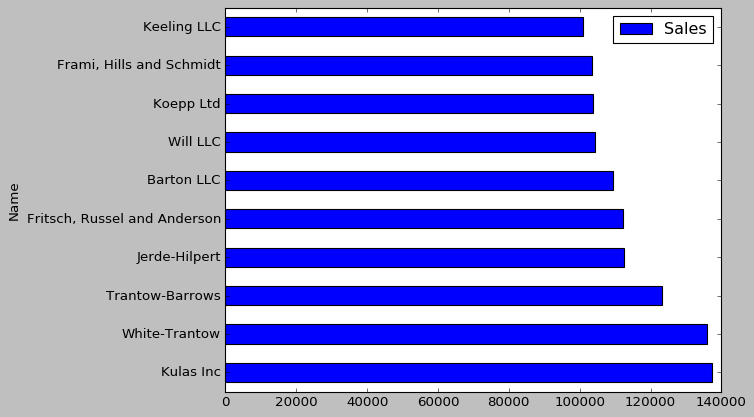

In [7]:
plt.style.use('classic')
top_10.plot(kind='barh', y="Sales", x="Name")

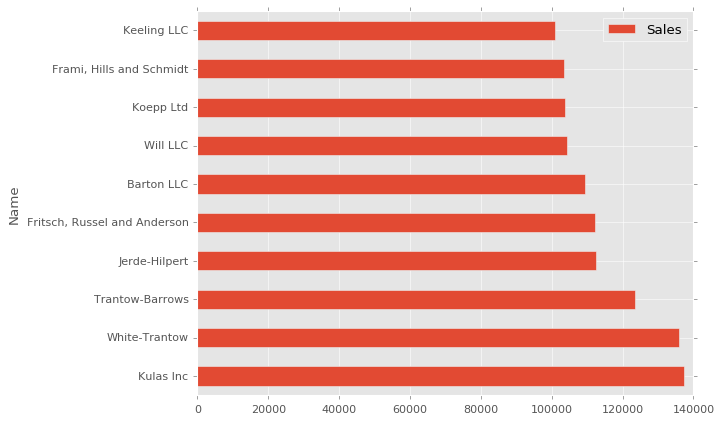

In [8]:
plt.style.use('ggplot')
top_10.plot(kind='barh', y="Sales", x="Name")

Text(0, 0.5, 'Customer')

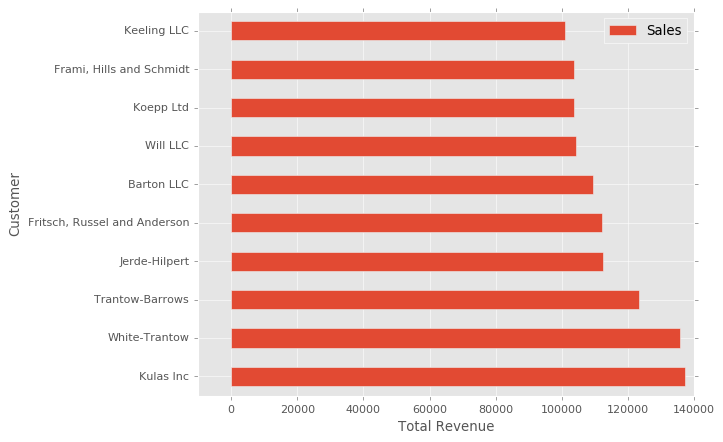

In [0]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Customer')

[Text(0, 0.5, 'Customer'),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, '2014 Revenue')]

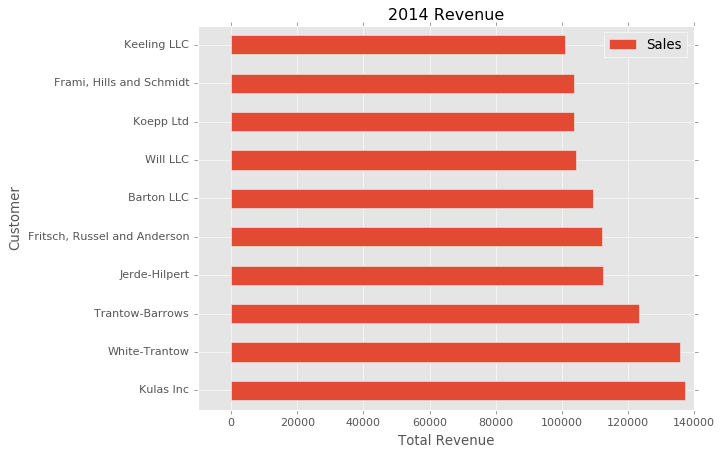

In [0]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

In [0]:
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue')
ax.legend().set_visible(False)

In [0]:
def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)

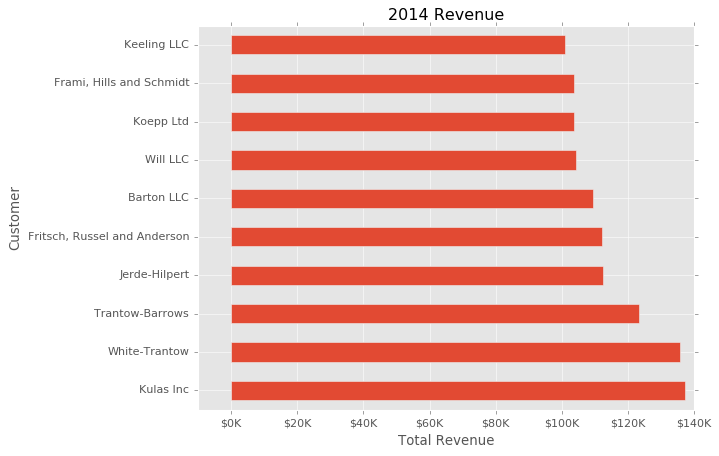

In [0]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

# Full code with comments

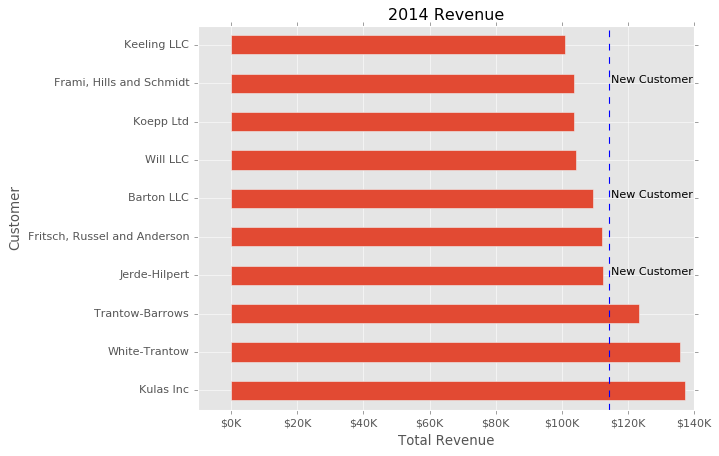

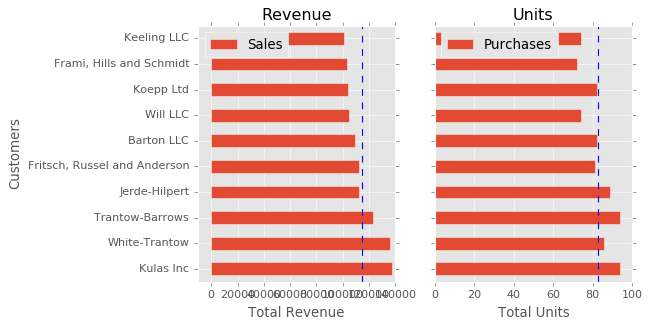

In [0]:
# Create the figure and the axes
fig, ax = plt.subplots()

# Plot the data and get the averaged
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
avg = top_10['Sales'].mean()

# Set limits and labels
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

# Add a line for the average
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Annotate the new customers
for cust in [3, 5, 8]:
    ax.text(115000, cust, "New Customer")

# Format the currency
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)

# Hide the legend
ax.legend().set_visible(False)

## Figures and plots
# fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))

# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(7, 4))
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax0)
ax0.set_xlim([-10000, 140000])
ax0.set(title='Revenue', xlabel='Total Revenue', ylabel='Customers')

# Plot the average as a vertical line
avg = top_10['Sales'].mean()
ax0.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Repeat for the unit plot
top_10.plot(kind='barh', y="Purchases", x="Name", ax=ax1)
avg = top_10['Purchases'].mean()
ax1.set(title='Units', xlabel='Total Units', ylabel='')
ax1.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)